<a href="https://colab.research.google.com/github/cindy-cyber/image_recognition/blob/main/image_recognition_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras #add layers
import matplotlib.pyplot as plt #graphing library

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


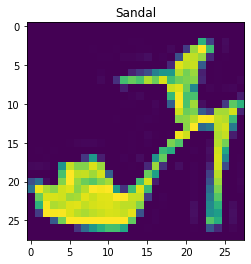

In [5]:
########data processing phase

#load dataset
data = keras.datasets.fashion_mnist #instead of loading a csv

#split data
(train_images, train_labels),(test_images,test_labels) = data.load_data()

#observe data
print(train_images.shape)

# the labels are just numbers.
# to make our lives easier, lets map the numbers to class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index = 9
image = train_images[index] #0-5999
label = train_labels[index]

plt.imshow(image)
plt.title(class_names[label]) #all the labels are numbers, we need to name the bucket
plt.show()

In [6]:
#keras API expexts 4 dimensions, need to reshape
#(60000, 28,28, 1) since we dont have rgb or stuff
train_images = train_images.reshape((train_images.shape[0],28,28,1)) #all images reshape to 28,28 -> 28,28,1, leave the 60000 alone
test_images =  test_images.reshape((test_images.shape[0],28,28,1))

#plt.imshow(image)
#plt.title(class_names[label])
#plt.show()


In [7]:
#shrink our dataset, from 0,255 to 0,1(normalize)
train_images = train_images/255.0 #(numpy arrays does it to every entry, brightness is the only factor here) 
test_images =  test_images/255.0  


[ [255, 128, … 128, 0]] [ [1.0, 0.5, …. 0.5, 0] ], the brightness of everything


In [13]:
#stacking the layers
model = keras.Sequential()
#input layer flatten from 2D list to 1D
model.add(keras.layers.Conv2D(28, (8,8), padding = "same", activation = "relu"))   


#model.add(keras.layers.Conv2D(1, (18,18), padding = "same", activation = "relu"))#adding two many conv2D doesnt help with anything but slows down the speed
#model.add(keras.layers.GlobalMaxPooling2D()) #generate a value that will summarize the strongest activation or presence of the vertical line in the input image.
model.add(keras.layers.Flatten(input_shape = (28,28,1))) #first layer

model.add(keras.layers.Dense(50, activation = "relu"))

#continue to add layers
#use 10 different filters, each with the size
#keras.layers.Flatten()
#output
#10 classes -> 10 neurons, softmax(like sigmoid, probablity) for polynomial classification
model.add(keras.layers.Dense(10,activation = "softmax"))

#compile the model
#loss: categorical, how to calculate the loss function cuz we have multiple buckets
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#train the model
model.fit(train_images, train_labels, epochs = 10)
model.summary()


Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.5206 - accuracy: 0.8130
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2838 - accuracy: 0.8960
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2295 - accuracy: 0.9155
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1940 - accuracy: 0.9297
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1667 - accuracy: 0.9375
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1379 - accuracy: 0.9485
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1135 - accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0944 - accuracy: 0.9654
Epoch 9/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0804 - accuracy: 0.9706
Epoch 10/10
1875/1875 [==============================] - 69s 37m

12730 = 12704 + 10 + 26

In [14]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print(test_loss, test_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.4044 - accuracy: 0.9018
0.40441226959228516 0.9017999768257141


In [15]:
#predict
import numpy as np
predictions = model.predict(test_images)
index = 5
#the list of confidence levels
print(predictions[index])
predicted_label_index = np.argmax(predictions[index])
predicted_class_label =  class_names[predicted_label_index]
actual_label_index = test_labels[index]
actual_class_label = class_names[actual_label_index]
print(predicted_class_label, actual_class_label)

[1.7903794e-16 1.0000000e+00 1.9999578e-24 7.2407510e-15 1.9811547e-26
 8.8710532e-21 1.7080889e-20 2.5811032e-20 1.7403781e-18 3.7044681e-23]
Trouser Trouser


In [ ]:
from google.colab import drive
drive.mount('/content/drive')